In [1]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks_cwt as cwt
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('binned2.csv')
spectra = df.drop(columns=['Serovar'])

In [10]:
spectra = spectra.mean()

In [66]:
peaks = list(cwt(spectra, np.arange(1,100), min_snr=5))
print(len(peaks))

93


In [57]:
# #unique_peak_index = list(set(all_peak_index))
# unique_peak_index = []
# for i in all_peak_index:
#     if all_peak_index.count(i) >= 40 and i not in unique_peak_index:
#         unique_peak_index.append(i)

In [58]:
#len(unique_peak_index)

Text(0, 0.5, 'Intensity')

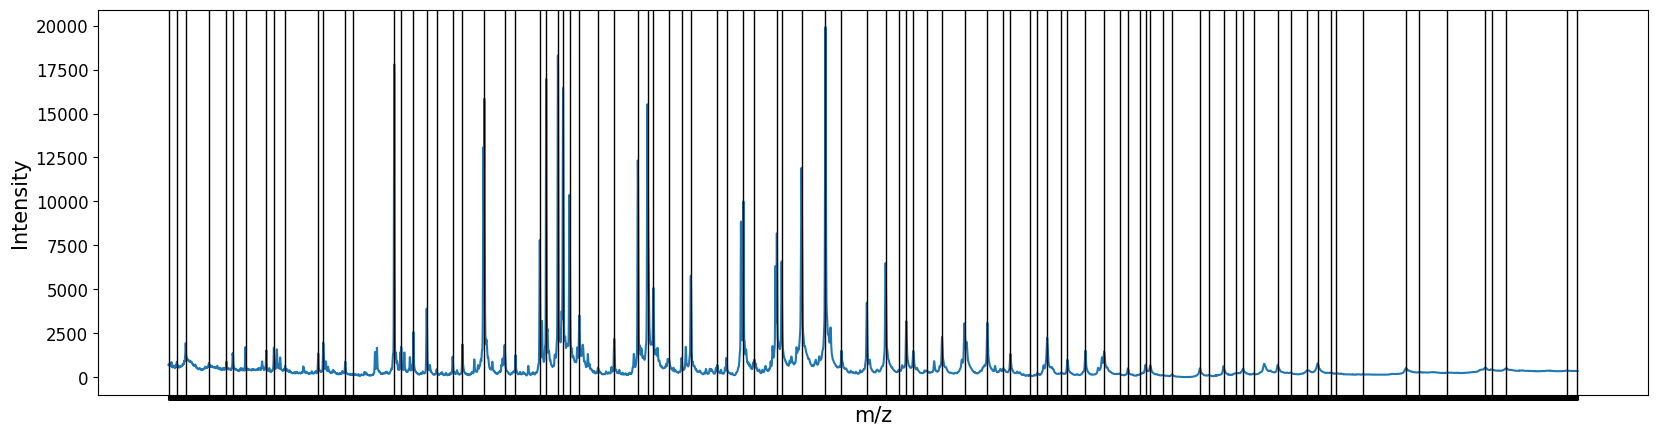

In [88]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.plot(spectra)
ax.xaxis.set_tick_params(labelbottom=False)
#sns.scatterplot(x = unique_peak_index, y = sample.iloc[unique_peak_index], 
#                color = 'red', alpha = 0.5)
for vl in peaks:
    ax.axvline(vl, c='black', linewidth=1)
plt.xlabel('m/z',fontsize=15)
plt.ylabel('Intensity',fontsize=15)

In [79]:
selected_peaks = spectra[peaks][spectra[peaks] > 1000].index
print(selected_peaks)

Index(['2181.6', '2687.8', '2826.0', '3047.0', '3127.6', '3579.8', '3632.0',
       '4367.0', '4461.9', '4620.0', '4762.8', '5035.6', '5144.6', '5379.6',
       '5614.2', '5740.6', '6010.7', '6096.9', '6257.0', '6318.3', '6385.6',
       '6485.6', '6858.8', '7160.8', '7263.2', '7323.2', '7615.7', '7721.0',
       '8121.4', '8370.4', '8556.4', '8921.6', '8995.7', '9240.0', '9523.6',
       '9729.7', '10067.2', '10285.8', '10541.6', '10624.1', '10955.7',
       '11213.5', '11476.5', '11766.0', '12224.5', '12518.9', '12768.0',
       '13028.0'],
      dtype='object')


/var/folders/86/gs0st1rs7pdf8q8ggp52x21h0000gn/T/ipykernel_23562/1795897384.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  selected_peaks = spectra[peaks][spectra[peaks] > 1000].index


Text(0, 0.5, 'Intensity')

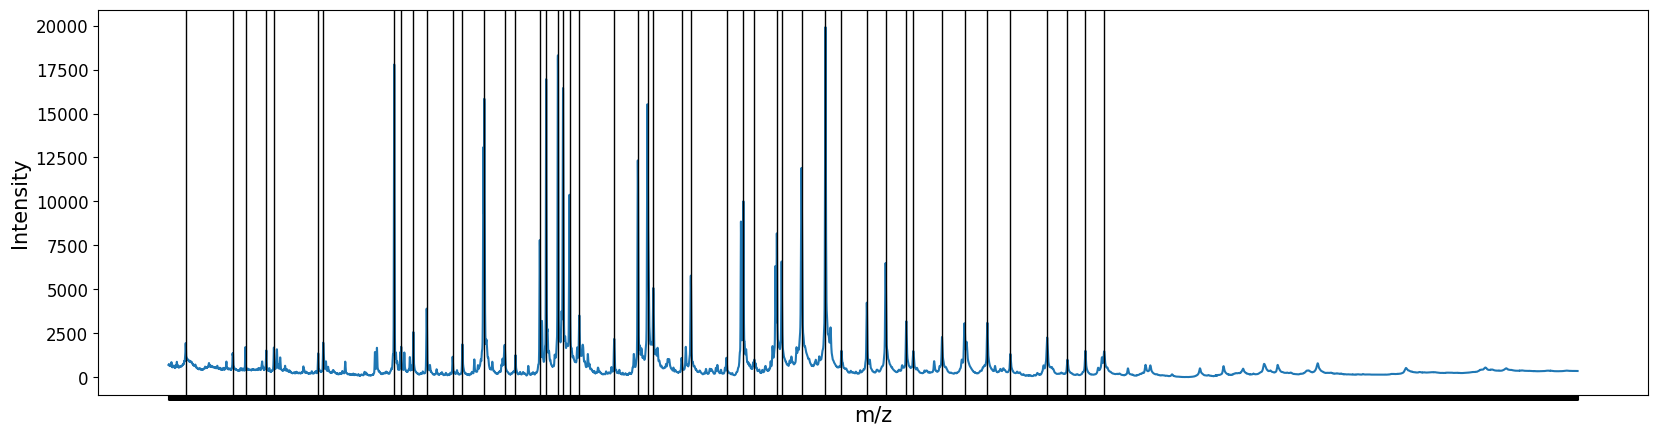

In [89]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.plot(spectra)
ax.xaxis.set_tick_params(labelbottom=False)
#sns.scatterplot(x = unique_peak_index, y = sample.iloc[unique_peak_index], 
#                color = 'red', alpha = 0.5)
for vl in selected_peaks:
    ax.axvline(vl, c='black', linewidth=1)
plt.xlabel('m/z',fontsize=15)
plt.ylabel('Intensity',fontsize=15)

Text(0, 0.5, 'Intensity')

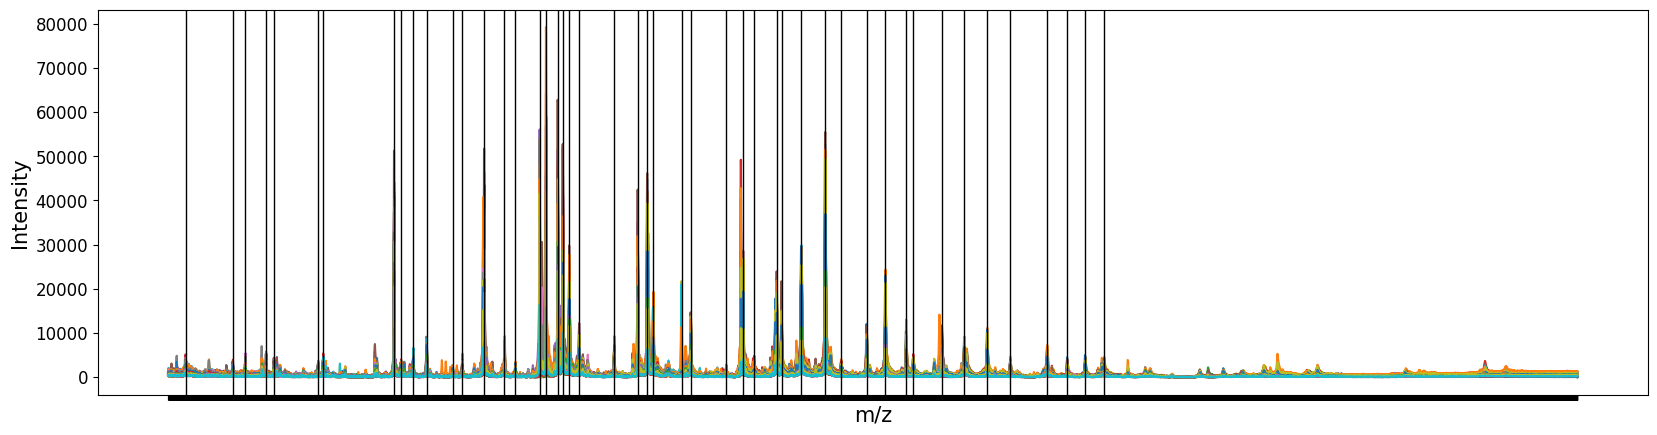

In [87]:
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
for i, s in df.drop(columns=['Serovar']).iterrows():
    ax.plot(s)
ax.xaxis.set_tick_params(labelbottom=False)
#sns.scatterplot(x = unique_peak_index, y = sample.iloc[unique_peak_index], 
#                color = 'red', alpha = 0.5)
for vl in selected_peaks:
    ax.axvline(vl, c='black', linewidth=1)
plt.xlabel('m/z',fontsize=15)
plt.ylabel('Intensity',fontsize=15)

In [20]:
unique_peak_index = [spectra.columns[x] for x in unique_peak_index]

In [21]:
float_upi = [float(x) for x in unique_peak_index]

In [22]:
unique_peak_index = sorted(float_upi,reverse=False)

In [23]:
unique_peak_index = [str(x) for x in unique_peak_index]

In [91]:
pd_spectra = df[list(selected_peaks)+['Serovar']]

In [92]:
pd_spectra.head()

,2181.6,2687.8,2826.0,3047.0,3127.6,3579.8,3632.0,4367.0,4461.9,4620.0,...,10624.1,10955.7,11213.5,11476.5,11766.0,12224.5,12518.9,12768.0,13028.0,Serovar
0,1817.502456,1316.330026,958.515528,1640.550572,1638.098191,601.902900,1235.115406,12571.426418,901.906510,2250.606598,...,882.347558,2834.375647,2525.627208,1945.393317,1157.847296,1941.400371,693.767344,1130.602880,1118.271018,Enteritidis
1,1261.873355,1000.718550,1273.326589,379.255834,923.388993,736.533723,967.924922,11196.967153,820.328538,1397.729707,...,658.899590,667.335855,1248.145110,1375.289843,479.573485,792.740858,847.597657,622.711512,599.379229,Enteritidis
2,1671.368180,1443.580809,1869.596996,827.757122,1217.411112,618.154592,1299.674523,17818.813232,1084.321744,1580.628164,...,1279.229978,1613.618832,2212.982469,2705.023094,650.782662,987.063566,822.225890,867.194210,937.098055,Enteritidis
3,702.729386,556.344327,407.750331,998.304188,906.328338,455.855110,951.690346,4621.854191,601.740829,1518.957471,...,662.451960,2284.348782,1597.899228,1188.703941,640.472370,1241.068201,574.205746,711.822847,573.883486,Enteritidis
4,893.258458,701.184580,483.956168,884.513421,877.316334,450.938074,862.280352,5555.781685,426.745178,1087.222212,...,486.559729,1370.951113,1103.966809,705.101933,421.978546,1022.921973,448.809364,431.283968,482.019621,Enteritidis


In [94]:
exp_name = 'peak_detected_spectra_final.csv'

In [95]:
pd_spectra.to_csv(f'{exp_name}.csv',index=False)

## Train Test Split

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
splits = train_test_split(pd_spectra.drop(columns=['Serovar']),pd_spectra['Serovar'], test_size=0.1, stratify=pd_spectra['Serovar'])

In [46]:
X_train, X_test, y_train, y_test = splits

In [47]:
X_train['Serovar'] = y_train

In [48]:
X_test['Serovar'] = y_test

In [49]:
X_test.Serovar.value_counts()

Serovar
Albany         4
Enteritidis    4
Agona          4
Altona         4
Typhimurium    4
Name: count, dtype: int64

In [52]:
X_train.to_csv(f'Peak Detected Spectra/Train Test Split/{exp_name}_train.csv',index=False)
X_test.to_csv(f'Peak Detected Spectra/Train Test Split/{exp_name}_test.csv',index=False)